In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
# _,m_train = X_train.shape

In [6]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5  # Input to 1st hidden layer
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5  # 1st hidden layer to 2nd hidden layer
    b2 = np.random.rand(10, 1) - 0.5
    W3 = np.random.rand(10, 10) - 0.5  # 2nd hidden layer to output layer
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2, W3, b3


def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)  # Activation of 1st hidden layer
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)  # Activation of 2nd hidden layer
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)  # Output layer
    return Z1, A1, Z2, A2, Z3, A3


def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3, axis=1, keepdims=True)

    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3


def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W2 = W2 - alpha * dW2 
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1  
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3
    return W1, b1, W2, b2, W3, b3


In [7]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return int((np.sum(predictions == Y) / Y.size) * 100)

def get_predictions(A2):
    return np.argmax(A2, 0)

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A3)
            print(f"Accuracy of the Network after training it {i} times: {get_accuracy(predictions, Y)}%")
    return W1, b1, W2, b2, W3, b3

In [8]:
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, 0.1, 1000)

Iteration:  0
[7 5 7 ... 5 0 7] [8 1 7 ... 5 7 6]
Accuracy of the Network after training it 0 times: 10%
Iteration:  10
[0 5 4 ... 0 1 9] [8 1 7 ... 5 7 6]
Accuracy of the Network after training it 10 times: 13%
Iteration:  20
[0 1 4 ... 0 1 9] [8 1 7 ... 5 7 6]
Accuracy of the Network after training it 20 times: 16%
Iteration:  30
[0 1 4 ... 0 1 4] [8 1 7 ... 5 7 6]
Accuracy of the Network after training it 30 times: 20%
Iteration:  40
[0 5 4 ... 0 1 4] [8 1 7 ... 5 7 6]
Accuracy of the Network after training it 40 times: 26%
Iteration:  50
[0 5 4 ... 0 1 6] [8 1 7 ... 5 7 6]
Accuracy of the Network after training it 50 times: 33%
Iteration:  60
[3 1 6 ... 0 1 6] [8 1 7 ... 5 7 6]
Accuracy of the Network after training it 60 times: 37%
Iteration:  70
[3 1 6 ... 0 1 6] [8 1 7 ... 5 7 6]
Accuracy of the Network after training it 70 times: 40%
Iteration:  80
[3 1 4 ... 3 1 6] [8 1 7 ... 5 7 6]
Accuracy of the Network after training it 80 times: 42%
Iteration:  90
[3 1 4 ... 3 1 6] [8 1 7

In [9]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    # Reshaping the image to 28x28 for visualization (assuming X_train is flattened to (784, num_samples))
    current_image = current_image.reshape((28, 28)) * 255  # Scaling to pixel range 0-255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


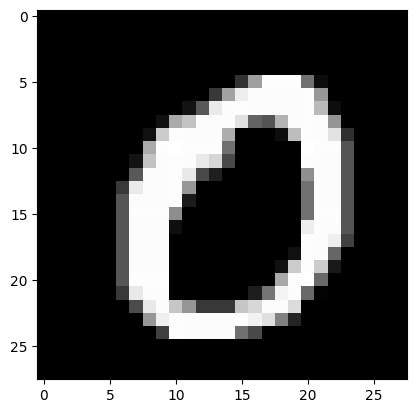

Prediction:  [2]
Label:  3


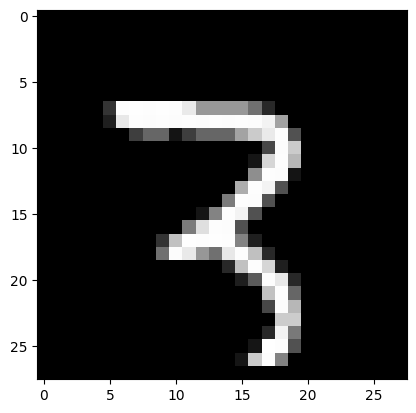

Prediction:  [2]
Label:  2


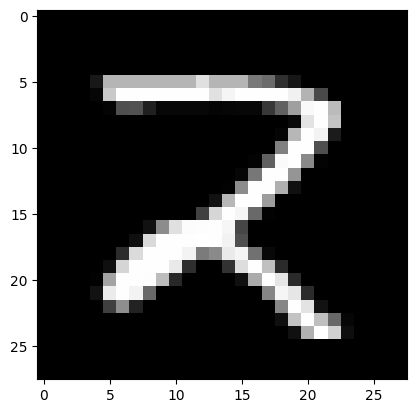

Prediction:  [7]
Label:  7


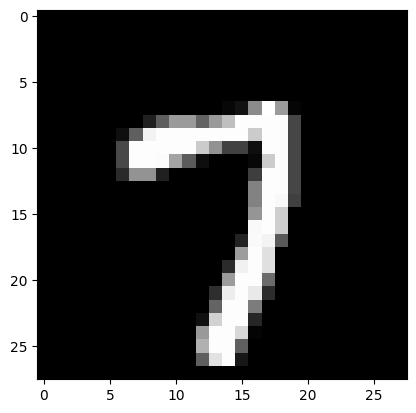

In [10]:
test_prediction(56, W1, b1, W2, b2, W3, b3)
test_prediction(78, W1, b1, W2, b2, W3, b3)
test_prediction(112, W1, b1, W2, b2, W3, b3)
test_prediction(13, W1, b1, W2, b2, W3, b3)